In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)

In [9]:
#dataframe
n_orders = 3000

order_ids = np.arange(1, n_orders + 1)
customer_ids = np.random.randint(1, 501, size=n_orders)

dates = pd.date_range(
    start="2021-01-01",
    end="2022-12-31",
    periods=n_orders
)

order_amounts = np.random.gamma(
    shape=2.0, scale=60.0, size=n_orders
).round(2)

product_categories = np.random.choice(
    ["Electronics", "Clothing", "Home", "Sports", "Books"],
    size=n_orders
)

df = pd.DataFrame({
    "order_id": order_ids,
    "customer_id": customer_ids,
    "order_date": dates,
    "order_amount": order_amounts,
    "product_category": product_categories
})

In [10]:
#head
df.head()

,order_id,customer_id,order_date,order_amount,product_category
0,1,103,2021-01-01 00:00:00.000000000,62.21,Home
1,2,436,2021-01-01 05:50:02.200733577,146.76,Electronics
2,3,349,2021-01-01 11:40:04.401467155,141.69,Sports
3,4,271,2021-01-01 17:30:06.602200733,7.00,Clothing
4,5,107,2021-01-01 23:20:08.802934311,120.42,Sports


In [12]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3000 non-null   int64         
 1   customer_id       3000 non-null   int64         
 2   order_date        3000 non-null   datetime64[ns]
 3   order_amount      3000 non-null   float64       
 4   product_category  3000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 117.3+ KB


In [14]:
#datetime
df["order_date"] = pd.to_datetime(df["order_date"])

In [15]:
#time-based features
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["year_month"] = df["order_date"].dt.to_period("M")

Time-based features were created to enable monthly aggregation and trend analysis.

📈 How do sales evolve over time?

In [16]:
monthly_sales = (
    df.groupby("year_month")["order_amount"]
    .sum()
    .reset_index()
)

monthly_sales["year_month"] = monthly_sales["year_month"].astype(str)

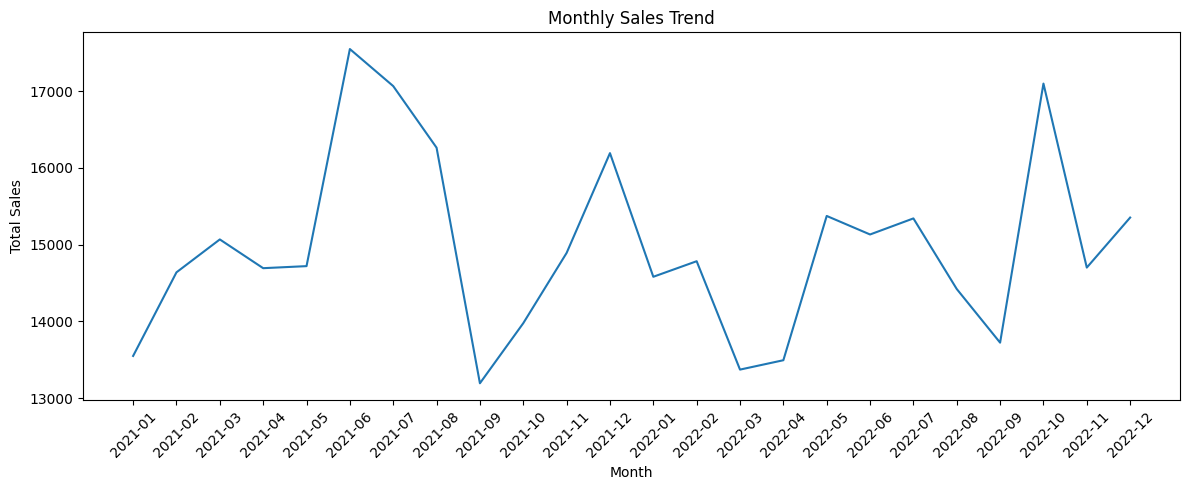

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["year_month"], monthly_sales["order_amount"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

Sales show a generally stable trend over time with natural fluctuations, suggesting consistent purchasing behavior.

🛒 Are customers placing more orders over time?

In [18]:
monthly_orders = (
    df.groupby("year_month")["order_id"]
    .count()
    .reset_index(name="order_count")
)

monthly_orders["year_month"] = monthly_orders["year_month"].astype(str)

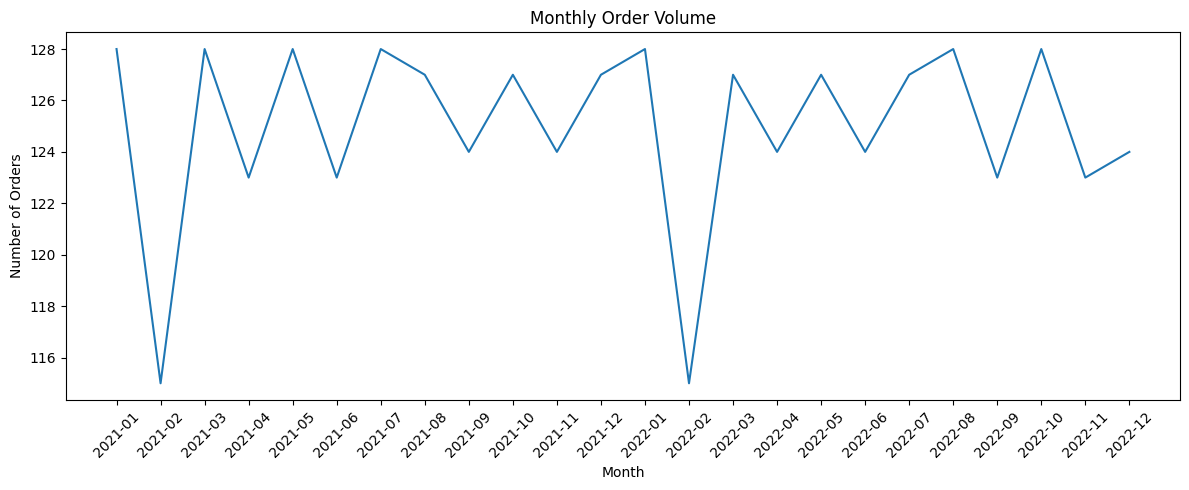

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_orders["year_month"], monthly_orders["order_count"])
plt.xticks(rotation=45)
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

Order volume remains relatively stable across months, indicating steady customer activity.

📅 Which months perform better historically?

In [20]:
seasonality = (
    df.groupby("month")["order_amount"]
    .mean()
    .reset_index()
)

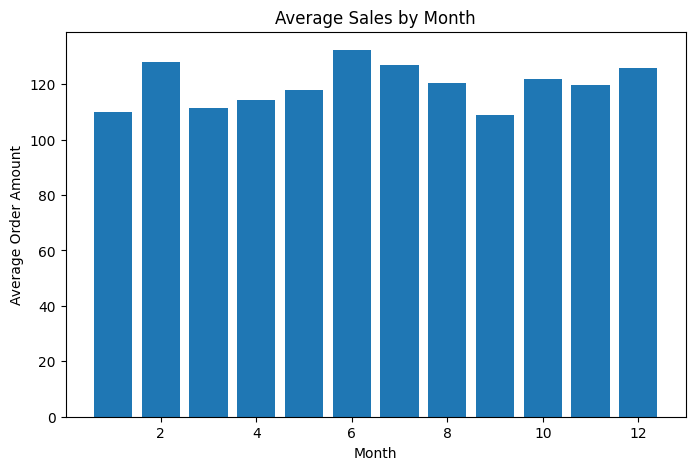

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(seasonality["month"], seasonality["order_amount"])
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Order Amount")
plt.show()

Certain months show higher average sales, suggesting mild seasonal effects in customer spending.

👥 Is the customer base growing over time?

In [22]:
monthly_customers = (
    df.groupby("year_month")["customer_id"]
    .nunique()
    .reset_index(name="unique_customers")
)

monthly_customers["year_month"] = monthly_customers["year_month"].astype(str)

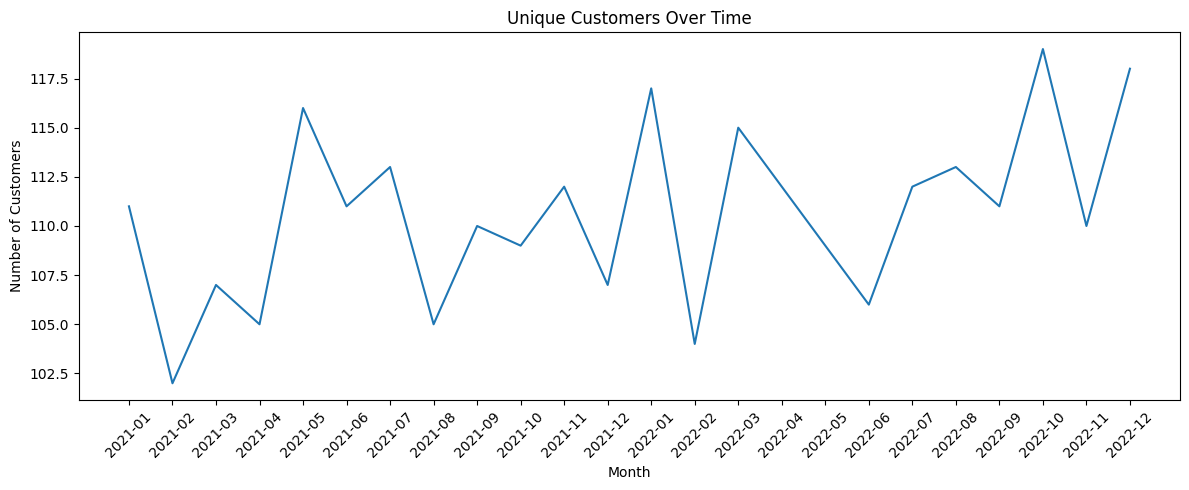

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_customers["year_month"], monthly_customers["unique_customers"])
plt.xticks(rotation=45)
plt.title("Unique Customers Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

The number of unique customers remains consistent over time, supporting stable revenue trends.

## 📊 Overall Insight

The analysis reveals a stable sales performance over time, supported by consistent customer activity and mild seasonal patterns.  
Monthly revenue fluctuations appear to be driven more by variations in order amounts than by changes in order volume.  
Overall, the business shows steady demand, suggesting a reliable customer base and predictable sales behavior.
